In [1]:
# Load the TensorBoard notebook extension
%load_ext tensorboard

from tensorflow.keras.callbacks import TensorBoard

In [2]:
# Clear any logs from previous runs
%rm -rf ../tensorboard_logs/

import tensorflow as tf

tf.config.list_physical_devices("GPU")

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


[]

# Data Import and Pre-processing

In [2]:
import pandas as pd
import numpy as np

In [3]:
creepy = pd.read_pickle('../pickles/creepy.pickle')
noncreepy = pd.read_pickle('../pickles/noncreepy.pickle')

In [4]:
creepy

,index,id,title,selftext,score,sum_vec,log_(score+min+0.01),sum_vec_with_log_prepended,selftext_sents_count,vec
0,0,gxsa0i,Do NOT Open Your Eyes... (Pt. 1),This is the only rule of our household. If you...,1,"[2.940986, -5.617336, 11.896912, -15.436118, -...",0.698135,"[0.6981347, 2.940986, -5.617336, 11.896912, -1...",38,"[0.6981347, 0.077394366, -0.14782463, 0.313076..."
1,1,gxs6jf,Do NOT open your eyes. (The Beginning),This is the only rule of our household. If you...,1,"[2.940986, -5.617336, 11.896912, -15.436118, -...",0.698135,"[0.6981347, 2.940986, -5.617336, 11.896912, -1...",38,"[0.6981347, 0.077394366, -0.14782463, 0.313076..."
2,2,gxrytp,My Best Friend Saw Bugs Under His Skin,It is hard for me to talk about my old friend ...,1,"[-19.201273, -13.715499, 24.393753, -33.97739,...",0.698135,"[0.6981347, -19.201273, -13.715499, 24.393753,...",81,"[0.6981347, -0.23705275, -0.16932714, 0.301157..."
3,3,gxrnj7,"I picked up a hitchhiker by mistake, now he's ...",They say the devil is in the details. Well th...,1,"[-60.77887, -33.726135, 119.47121, -95.021385,...",0.698135,"[0.6981347, -60.77887, -33.726135, 119.47121, ...",429,"[0.6981347, -0.14167568, -0.0786157, 0.2784876..."
4,4,gxrm8v,I'm tasked with killing nameless things out in...,“Any sign of ‘em yet?” \n\nI continued staring...,1,"[-22.785084, 14.806147, 26.129469, -24.832222,...",0.698135,"[0.6981347, -22.785084, 14.806147, 26.129469, ...",177,"[0.6981347, -0.12872928, 0.083650544, 0.147624..."
...,...,...,...,...,...,...,...,...,...,...
15367,15367,eihp0m,Hylophobia,*There is no cure for trauma. Once it enters t...,1,"[-51.169456, -5.836507, 70.7862, -111.05138, 7...",0.698135,"[0.6981347, -51.169456, -5.836507, 70.7862, -1...",447,"[0.6981347, -0.11447306, -0.013057062, 0.15835..."
15368,15368,eihmg7,I adopted my late sisters orphaned child. This...,"I knew Persephone would need time to adjust, b...",1,"[-22.327501, -34.563572, 39.197514, -72.437645...",0.698135,"[0.6981347, -22.327501, -34.563572, 39.197514,...",246,"[0.6981347, -0.0907622, -0.14050232, 0.1593394..."
15369,15369,eihgtp,My first paranormal experience!!,"This isnt much, but this is surely the first u...",1,"[-4.7810946, 0.12821773, 2.941056, -3.949329, ...",0.698135,"[0.6981347, -4.7810946, 0.12821773, 2.941056, ...",12,"[0.6981347, -0.39842454, 0.010684811, 0.245088..."
15370,15370,eigzgj,I met the demon under my bed... Its not what I...,"Okay. for context, this story started about a ...",1,"[-1.7662485, -4.471965, 8.116567, -12.409156, ...",0.698135,"[0.6981347, -1.7662485, -4.471965, 8.116567, -...",30,"[0.6981347, -0.05887495, -0.1490655, 0.2705522..."


In [5]:
creepy_sum_vec_with_log_prepended = creepy.loc[:,'vec'].copy()
noncreepy_sum_vec_with_log_prepended = noncreepy.loc[:,'vec'].copy()

In [24]:
creepy_features = pd.DataFrame(creepy_sum_vec_with_log_prepended.to_list()).to_numpy(dtype = float)
creepy_labels = np.ones(len(creepy_features))
creepy_features.shape

(15372, 769)

In [25]:
noncreepy_features = pd.DataFrame(noncreepy_sum_vec_with_log_prepended.to_list()).to_numpy(dtype = float)
noncreepy_labels = np.zeros(len(noncreepy_features))
noncreepy_features.shape

(22474, 769)

In [28]:
creepy_features.shape[0]

15372

In [8]:
features = np.concatenate((creepy_features, noncreepy_features))
labels = np.concatenate((creepy_labels, noncreepy_labels))
print(features, labels)

[[ 0.69813472  0.07739437 -0.14782463 ... -0.12086978  0.00944329
  -0.23866224]
 [ 0.69813472  0.07739437 -0.14782463 ... -0.12086978  0.00944329
  -0.23866224]
 [ 0.69813472 -0.23705275 -0.16932714 ...  0.22444913 -0.20354605
  -0.08335517]
 ...
 [ 0.69813472 -0.06071103  0.02235722 ...  0.10523307 -0.29174414
  -0.14749481]
 [ 0.69813472  0.14904401 -0.10234425 ... -0.13638787  0.24349198
   0.0390255 ]
 [ 0.69813472 -0.24383056 -0.36296186 ...  0.32824722 -0.14198837
  -0.42668518]] [1. 1. 1. ... 0. 0. 0.]


In [9]:
print(features.shape, labels.shape)

(37846, 769) (37846,)


In [10]:
from sklearn.utils import shuffle

features, labels = shuffle(features, labels)
print(features, labels)

[[ 0.69813472  0.23847556 -0.07256381 ... -0.19968446 -0.28175896
  -0.10118125]
 [ 0.69813472  0.03350068 -0.03440738 ...  0.02281426 -0.01858474
  -0.24240874]
 [ 0.69813472 -0.19374098  0.13932434 ... -0.10303188  0.06121886
  -0.02176117]
 ...
 [ 0.69813472  0.1314432   0.06563003 ... -0.54260391 -0.28908625
  -0.41169348]
 [ 0.69813472 -0.04103507 -0.34764257 ... -0.09614738 -0.25252107
  -0.27853459]
 [ 0.69813472 -0.28331295  0.17450042 ...  0.00892181  0.0192121
   0.14691594]] [0. 1. 0. ... 0. 0. 1.]


In [11]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_features = scaler.fit_transform(features)
print(scaled_features, labels)

[[0.         0.57155153 0.43673019 ... 0.44235275 0.42989653 0.41567935]
 [0.         0.51297509 0.44947084 ... 0.51151443 0.52537747 0.37635894]
 [0.         0.44803539 0.50748086 ... 0.47239631 0.55433062 0.43779141]
 ...
 [0.         0.54096449 0.48287391 ... 0.33575939 0.42723815 0.32922687]
 [0.         0.49167473 0.34487982 ... 0.47453629 0.44050419 0.36630082]
 [0.         0.42243808 0.51922635 ... 0.50719609 0.53909035 0.48475431]] [0. 1. 0. ... 0. 0. 1.]


- [x] 70% train, 15% val, 15% test
 - Train: 26500
 - Valid: 5677
 - Test: 5669
- [ ] 80% train, 10% val, 10% test
- [ ] 60% train, 20% val, 20% test

In [12]:
scaled_features[:,0]

array([0., 0., 0., ..., 0., 0., 0.])

In [13]:
X_train, X_valid, X_test = scaled_features[:26500], scaled_features[26500:26500+5677], scaled_features[26500+5677:]
y_train, y_valid, y_test = labels[:26500], labels[26500:26500+5677], labels[26500+5677:]

In [14]:
import tensorflow as tf
from tensorflow import keras

# Model here

In [16]:
model = keras.Sequential([
#     keras.layers.Dense(units = 303, input_shape = (769,), activation = 'relu'),
#     keras.layers.Dropout(0.5),
    keras.layers.Dense(units = 303, input_shape = (769,), activation = 'relu'),
    keras.layers.Dropout(0.1),
#     keras.layers.Dense(units = 256, activation = 'relu'),
    keras.layers.Dense(units = 128, activation = 'relu'),
    keras.layers.Dense(units = 64, activation = 'relu'),
    keras.layers.Dense(units = 32, activation = 'relu'),
    keras.layers.Dense(units = 16, activation = 'relu'),
    keras.layers.Dense(units = 1, activation = 'sigmoid') # here the units must be 1 in order for binary classifications to work
])

In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 303)               233310    
_________________________________________________________________
dropout (Dropout)            (None, 303)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               38912     
_________________________________________________________________
dense_2 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_3 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_4 (Dense)              (None, 16)                528       
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 1

In [18]:
model.compile(loss = 'binary_crossentropy',
             optimizer = keras.optimizers.Adam(lr=0.000959, beta_1 = 0.9, beta_2=0.999), # you can tune the learning rate here. Default lr = 0.01
             metrics=['accuracy'])

In [19]:
import os
root_logdir = os.path.join(os.curdir, "tensorboard_logs")

def get_run_log_dir():
    import time
    run_id = time.strftime("run_%Y_%m_%d-%H_%M_%S")
    return os.path.join(root_logdir, run_id)

run_logdir = get_run_log_dir()

tensorboard_cb = keras.callbacks.TensorBoard(run_logdir)

history = model.fit(X_train, y_train, epochs = 30, 
                   validation_data=(X_valid, y_valid),
                   callbacks=[tensorboard_cb])

%tensorboard --logdir tensorboard_logs

Epoch 1/30
  1/829 [..............................] - ETA: 0s - loss: 0.6924 - accuracy: 0.5000WARNING:tensorflow:From /Users/anthony/Documents/GitHub/Research-Mapping-Uncanny-Valley/.venv/creepyvenv/lib/python3.8/site-packages/tensorflow/python/ops/summary_ops_v2.py:1277: stop (from tensorflow.python.eager.profiler) is deprecated and will be removed after 2020-07-01.
Instructions for updating:
use `tf.profiler.experimental.stop` instead.
829/829 [==============================] - 3s 3ms/step - loss: 0.4054 - accuracy: 0.8001 - val_loss: 0.3031 - val_accuracy: 0.8723
Epoch 2/30
829/829 [==============================] - 2s 2ms/step - loss: 0.2622 - accuracy: 0.8973 - val_loss: 0.3511 - val_accuracy: 0.8755
Epoch 3/30
829/829 [==============================] - 2s 2ms/step - loss: 0.2640 - accuracy: 0.8944 - val_loss: 0.2416 - val_accuracy: 0.9010
Epoch 4/30
829/829 [==============================] - 2s 2ms/step - loss: 0.2841 - accuracy: 0.8798 - val_loss: 0.3652 - val_accuracy: 0.8445


Reusing TensorBoard on port 6007 (pid 52840), started 0:01:56 ago. (Use '!kill 52840' to kill it.)

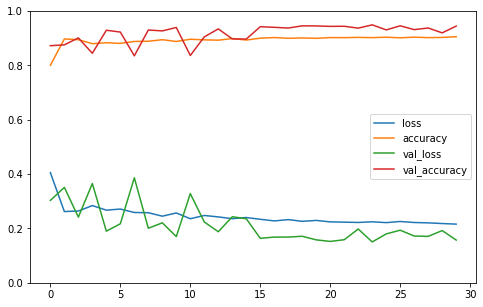

In [20]:
import matplotlib.pyplot as plt
pd.DataFrame(history.history).plot(figsize = (8,5))
plt.grid = True
plt.gca().set_ylim(0,1)
plt.show()

In [21]:
model.evaluate(X_test, y_test)

178/178 [==============================] - 0s 1ms/step - loss: 0.1607 - accuracy: 0.9436


[0.16067270934581757, 0.9435526728630066]

In [22]:
model.save('../models/self-tuned-model')

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: ./models/self-tuned-model/assets


# Keras Tuner

In [23]:
import kerastuner as kt
from tensorflow import keras
from tensorflow.keras.layers import Dense, Dropout
import time

In [24]:
kt.__version__

'1.0.1'

In [25]:
LOG_DIR = f"../keras_tuner_logs/{int(time.time())}"

In [26]:
def build_model(hp):
    model = keras.Sequential()

    # Tune the number of units in the first Dense layer
    # Choose an optimal value between 256-512 step 32
    hp_input_units = hp.Int('input_units', min_value = 256, max_value = 512, step = 8)
    model.add(Dense(units = hp_input_units, input_shape = (769,), activation = 'relu'))
    
    for i in range(hp.Int("n_layers", min_value = 1, max_value = 5)):
        # Tune the number of units in the each Dense layer
        # Choose an optimal value between 8-512 step 8
        hp_dense_i_units = hp.Int(f"dense_{i}_units", min_value = 8, max_value = 512, step = 8)
        model.add(Dense(units = hp_dense_i_units, activation = 'relu'))
        
        # Tune the number of dropout rate between Dense layers
        # Choose an optimal value between 0-0.5 step 0.1
        hp_dense_i_dropout_rate = hp.Float(f"dense_{i}_dropout_rate", min_value = 0, max_value = 0.5, step = 0.1)
        model.add(Dropout(hp_dense_i_dropout_rate))
    
    model.add(Dense(units = 1, activation = 'sigmoid'))# here the units must be 1 in order for binary classifications to work
    
    # Tune the number of dropout rate between Dense layers
    # Choose an optimal value between 0.0008-0.001 step 0.00002
    # 10 numbers
    hp_lr_rate = hp.Float(f"optimizer_lr_rate", min_value = 0.0008, max_value = 0.001, step = 0.00002)
    model.compile(loss = 'binary_crossentropy',
             optimizer = keras.optimizers.Adam(lr=hp_lr_rate, beta_1 = 0.9, beta_2=0.999), # you can tune the learning rate here. Default lr = 0.01
             metrics=['accuracy'])
    
    return model

In [27]:
tuner = kt.RandomSearch(
    build_model,
    objective = "val_accuracy",
    max_trials = 5,
    executions_per_trial = 3,
    directory = LOG_DIR
)

In [28]:
tuner.search(x = X_train,
             y = y_train,
             epochs = 30,
#              batch_size = 64,
             validation_data = (X_valid, y_valid))

Epoch 1/30
829/829 [==============================] - ETA: 0s - loss: 0.7040 - accuracy: 0.46 - ETA: 2s - loss: 0.6926 - accuracy: 0.57 - ETA: 2s - loss: 0.6891 - accuracy: 0.56 - ETA: 2s - loss: 0.6805 - accuracy: 0.58 - ETA: 2s - loss: 0.6754 - accuracy: 0.58 - ETA: 2s - loss: 0.6733 - accuracy: 0.58 - ETA: 2s - loss: 0.6679 - accuracy: 0.60 - ETA: 2s - loss: 0.6592 - accuracy: 0.61 - ETA: 2s - loss: 0.6426 - accuracy: 0.62 - ETA: 2s - loss: 0.6269 - accuracy: 0.63 - ETA: 2s - loss: 0.6123 - accuracy: 0.64 - ETA: 2s - loss: 0.5963 - accuracy: 0.66 - ETA: 2s - loss: 0.5864 - accuracy: 0.67 - ETA: 2s - loss: 0.5726 - accuracy: 0.68 - ETA: 2s - loss: 0.5548 - accuracy: 0.69 - ETA: 2s - loss: 0.5430 - accuracy: 0.70 - ETA: 1s - loss: 0.5351 - accuracy: 0.71 - ETA: 1s - loss: 0.5260 - accuracy: 0.72 - ETA: 1s - loss: 0.5189 - accuracy: 0.72 - ETA: 1s - loss: 0.5057 - accuracy: 0.73 - ETA: 1s - loss: 0.5079 - accuracy: 0.73 - ETA: 1s - loss: 0.5083 - accuracy: 0.73 - ETA: 1s - loss: 0.5035

Epoch 1/30
829/829 [==============================] - ETA: 0s - loss: 0.6750 - accuracy: 0.65 - ETA: 2s - loss: 0.6829 - accuracy: 0.59 - ETA: 2s - loss: 0.6854 - accuracy: 0.57 - ETA: 2s - loss: 0.6841 - accuracy: 0.59 - ETA: 2s - loss: 0.6841 - accuracy: 0.59 - ETA: 2s - loss: 0.6842 - accuracy: 0.59 - ETA: 2s - loss: 0.6839 - accuracy: 0.59 - ETA: 2s - loss: 0.6832 - accuracy: 0.58 - ETA: 2s - loss: 0.6831 - accuracy: 0.58 - ETA: 2s - loss: 0.6811 - accuracy: 0.59 - ETA: 2s - loss: 0.6797 - accuracy: 0.59 - ETA: 2s - loss: 0.6782 - accuracy: 0.59 - ETA: 1s - loss: 0.6753 - accuracy: 0.59 - ETA: 1s - loss: 0.6702 - accuracy: 0.59 - ETA: 1s - loss: 0.6662 - accuracy: 0.59 - ETA: 1s - loss: 0.6656 - accuracy: 0.59 - ETA: 1s - loss: 0.6604 - accuracy: 0.59 - ETA: 1s - loss: 0.6515 - accuracy: 0.60 - ETA: 1s - loss: 0.6382 - accuracy: 0.61 - ETA: 1s - loss: 0.6305 - accuracy: 0.62 - ETA: 1s - loss: 0.6199 - accuracy: 0.63 - ETA: 1s - loss: 0.6095 - accuracy: 0.64 - ETA: 1s - loss: 0.6025

Epoch 1/30
829/829 [==============================] - ETA: 0s - loss: 0.6117 - accuracy: 0.68 - ETA: 4s - loss: 0.7088 - accuracy: 0.53 - ETA: 3s - loss: 0.7004 - accuracy: 0.56 - ETA: 3s - loss: 0.7028 - accuracy: 0.56 - ETA: 3s - loss: 0.6960 - accuracy: 0.56 - ETA: 3s - loss: 0.6969 - accuracy: 0.57 - ETA: 3s - loss: 0.6953 - accuracy: 0.56 - ETA: 3s - loss: 0.6953 - accuracy: 0.56 - ETA: 3s - loss: 0.6939 - accuracy: 0.56 - ETA: 3s - loss: 0.6931 - accuracy: 0.56 - ETA: 3s - loss: 0.6915 - accuracy: 0.56 - ETA: 3s - loss: 0.6904 - accuracy: 0.57 - ETA: 3s - loss: 0.6906 - accuracy: 0.56 - ETA: 3s - loss: 0.6888 - accuracy: 0.57 - ETA: 3s - loss: 0.6893 - accuracy: 0.57 - ETA: 3s - loss: 0.6886 - accuracy: 0.57 - ETA: 2s - loss: 0.6885 - accuracy: 0.57 - ETA: 2s - loss: 0.6876 - accuracy: 0.57 - ETA: 2s - loss: 0.6872 - accuracy: 0.57 - ETA: 2s - loss: 0.6862 - accuracy: 0.57 - ETA: 2s - loss: 0.6860 - accuracy: 0.57 - ETA: 3s - loss: 0.6856 - accuracy: 0.57 - ETA: 3s - loss: 0.6843

Epoch 1/30
829/829 [==============================] - ETA: 0s - loss: 0.6874 - accuracy: 0.62 - ETA: 3s - loss: 0.6982 - accuracy: 0.52 - ETA: 3s - loss: 0.6942 - accuracy: 0.56 - ETA: 3s - loss: 0.6912 - accuracy: 0.56 - ETA: 3s - loss: 0.6906 - accuracy: 0.57 - ETA: 3s - loss: 0.6919 - accuracy: 0.57 - ETA: 3s - loss: 0.6886 - accuracy: 0.57 - ETA: 3s - loss: 0.6878 - accuracy: 0.58 - ETA: 3s - loss: 0.6865 - accuracy: 0.58 - ETA: 3s - loss: 0.6848 - accuracy: 0.59 - ETA: 3s - loss: 0.6852 - accuracy: 0.58 - ETA: 3s - loss: 0.6846 - accuracy: 0.58 - ETA: 3s - loss: 0.6844 - accuracy: 0.58 - ETA: 3s - loss: 0.6839 - accuracy: 0.58 - ETA: 2s - loss: 0.6839 - accuracy: 0.58 - ETA: 2s - loss: 0.6825 - accuracy: 0.59 - ETA: 2s - loss: 0.6817 - accuracy: 0.59 - ETA: 2s - loss: 0.6818 - accuracy: 0.59 - ETA: 2s - loss: 0.6822 - accuracy: 0.58 - ETA: 2s - loss: 0.6823 - accuracy: 0.58 - ETA: 2s - loss: 0.6819 - accuracy: 0.58 - ETA: 2s - loss: 0.6814 - accuracy: 0.58 - ETA: 2s - loss: 0.6811

Epoch 1/30
829/829 [==============================] - ETA: 0s - loss: 0.7050 - accuracy: 0.56 - ETA: 1s - loss: 0.7020 - accuracy: 0.56 - ETA: 1s - loss: 0.6905 - accuracy: 0.57 - ETA: 1s - loss: 0.6848 - accuracy: 0.58 - ETA: 1s - loss: 0.6849 - accuracy: 0.57 - ETA: 1s - loss: 0.6813 - accuracy: 0.57 - ETA: 1s - loss: 0.6760 - accuracy: 0.57 - ETA: 1s - loss: 0.6740 - accuracy: 0.58 - ETA: 1s - loss: 0.6757 - accuracy: 0.58 - ETA: 1s - loss: 0.6764 - accuracy: 0.58 - ETA: 1s - loss: 0.6768 - accuracy: 0.58 - ETA: 1s - loss: 0.6768 - accuracy: 0.58 - ETA: 1s - loss: 0.6760 - accuracy: 0.59 - ETA: 1s - loss: 0.6758 - accuracy: 0.59 - ETA: 1s - loss: 0.6744 - accuracy: 0.59 - ETA: 1s - loss: 0.6743 - accuracy: 0.59 - ETA: 1s - loss: 0.6741 - accuracy: 0.59 - ETA: 1s - loss: 0.6739 - accuracy: 0.59 - ETA: 0s - loss: 0.6741 - accuracy: 0.59 - ETA: 0s - loss: 0.6748 - accuracy: 0.59 - ETA: 0s - loss: 0.6758 - accuracy: 0.58 - ETA: 0s - loss: 0.6757 - accuracy: 0.59 - ETA: 0s - loss: 0.6757

INFO:tensorflow:Oracle triggered exit


In [29]:
tuner.get_best_hyperparameters(num_trials=1)

In [30]:
# tuner.results_summery()

In [31]:
tuner.get_best_models()[0].summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 408)               314160    
_________________________________________________________________
dense_1 (Dense)              (None, 40)                16360     
_________________________________________________________________
dropout (Dropout)            (None, 40)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 344)               14104     
_________________________________________________________________
dropout_1 (Dropout)          (None, 344)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 328)               113160    
_________________________________________________________________
dropout_2 (Dropout)          (None, 328)               0

In [32]:
model = tuner.get_best_models()[0]

In [33]:
import os
root_logdir = os.path.join(os.curdir, "tensorboard_logs")

def get_run_log_dir():
    import time
    run_id = time.strftime("run_%Y_%m_%d-%H_%M_%S")
    return os.path.join(root_logdir, run_id)

run_logdir = get_run_log_dir()

tensorboard_cb = keras.callbacks.TensorBoard(run_logdir)

history = model.fit(X_train, y_train, epochs = 30, 
                   validation_data=(X_valid, y_valid),
                   callbacks=[tensorboard_cb])

%tensorboard --logdir tensorboard_logs

Epoch 1/30
829/829 [==============================] - ETA: 51s - loss: 0.1215 - accuracy: 0.9471 - ETA: 30s - loss: 0.1130 - accuracy: 0.952 - ETA: 18s - loss: 0.1164 - accuracy: 0.953 - ETA: 14s - loss: 0.1245 - accuracy: 0.952 - ETA: 12s - loss: 0.1260 - accuracy: 0.950 - ETA: 10s - loss: 0.1221 - accuracy: 0.950 - ETA: 9s - loss: 0.1300 - accuracy: 0.950 - ETA: 8s - loss: 0.1292 - accuracy: 0.95 - ETA: 7s - loss: 0.1238 - accuracy: 0.95 - ETA: 6s - loss: 0.1203 - accuracy: 0.95 - ETA: 6s - loss: 0.1228 - accuracy: 0.95 - ETA: 5s - loss: 0.1253 - accuracy: 0.95 - ETA: 5s - loss: 0.1252 - accuracy: 0.95 - ETA: 5s - loss: 0.1266 - accuracy: 0.95 - ETA: 5s - loss: 0.1291 - accuracy: 0.95 - ETA: 4s - loss: 0.1307 - accuracy: 0.95 - ETA: 4s - loss: 0.1299 - accuracy: 0.95 - ETA: 4s - loss: 0.1294 - accuracy: 0.95 - ETA: 4s - loss: 0.1288 - accuracy: 0.95 - ETA: 4s - loss: 0.1315 - accuracy: 0.95 - ETA: 3s - loss: 0.1331 - accuracy: 0.95 - ETA: 3s - loss: 0.1324 - accuracy: 0.95 - ETA: 3s 

Reusing TensorBoard on port 6007 (pid 52840), started 4:23:04 ago. (Use '!kill 52840' to kill it.)

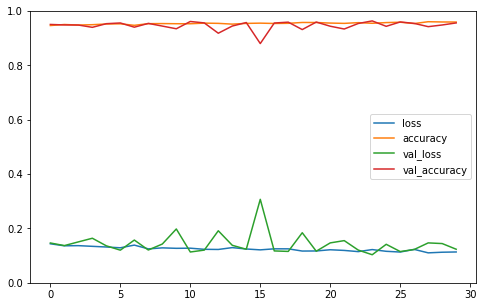

In [34]:
import matplotlib.pyplot as plt
pd.DataFrame(history.history).plot(figsize = (8,5))
plt.grid = True
plt.gca().set_ylim(0,1)
plt.show()

In [35]:
model.evaluate(X_test, y_test)

178/178 [==============================] - ETA: 0s - loss: 0.1500 - accuracy: 0.93 - ETA: 0s - loss: 0.1282 - accuracy: 0.95 - ETA: 0s - loss: 0.1289 - accuracy: 0.95 - ETA: 0s - loss: 0.1293 - accuracy: 0.95 - ETA: 0s - loss: 0.1274 - accuracy: 0.95 - ETA: 0s - loss: 0.1275 - accuracy: 0.95 - ETA: 0s - loss: 0.1266 - accuracy: 0.95 - ETA: 0s - loss: 0.1266 - accuracy: 0.95 - ETA: 0s - loss: 0.1249 - accuracy: 0.95 - 0s 2ms/step - loss: 0.1264 - accuracy: 0.9566


[0.12637019157409668, 0.9566060900688171]

In [36]:
model.save('../models/keras-tuner-tuned-model')

INFO:tensorflow:Assets written to: ./models/keras-tuner-tuned-model/assets


# Real-world Test (r/shortscarystories and r/self)

In [10]:
import numpy as np
from tensorflow import keras
# model = keras.models.load_model('../models/self-tuned-model')
model = keras.models.load_model('../models/keras-tuner-tuned-model')

In [16]:
from sentence_transformers import SentenceTransformer
sbert_model = SentenceTransformer('distilbert-base-nli-stsb-mean-tokens')

text_creepy = """
This robot man is holding a knife. It is disassembling its fingers.
"""

text_non_creepy = """
This woman is holding a knife. She cut her fingers.
"""

import spacy

# spacy.prefer_gpu()
# Must return True for GPU to work

nlp = spacy.load('en_core_web_lg')

# need nlp and model
def sum_vec(text):
    doc = nlp(text)
    sentences = [sent.text for sent in doc.sents]
    comment_vec = sbert_model.encode(sentences)
    return np.sum(comment_vec, axis = 0)

In [17]:
from sklearn.preprocessing import MinMaxScaler
creepy_vec = np.concatenate(([np.log(1+1+0.01)],sum_vec(text_creepy)))
non_creepy_vec = np.concatenate(([np.log(1+1+0.01)],sum_vec(text_non_creepy)))
vecs = np.array([creepy_vec, non_creepy_vec])
vecs

scaler = MinMaxScaler(feature_range=(0, 1))
scaled_vecs = scaler.fit_transform(vecs)

model.predict(scaled_vecs)
# model.evaluate(scaled_vecs)

array([[1.9484428e-11],
       [9.9517781e-01]], dtype=float32)

In [40]:
model

Failed

In [2]:
import spacy

In [4]:
nlp = spacy.load("en_core_web_sm")
doc = nlp(text_non_creepy)
for idx, sents in enumerate(doc.sents):
    pass
print(idx)

3


In [15]:
from tensorflow import keras
model = keras.models.load_model('../models/keras-tuner-tuned-model/')

In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 408)               314160    
_________________________________________________________________
dense_1 (Dense)              (None, 40)                16360     
_________________________________________________________________
dropout (Dropout)            (None, 40)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 344)               14104     
_________________________________________________________________
dropout_1 (Dropout)          (None, 344)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 328)               113160    
_________________________________________________________________
dropout_2 (Dropout)          (None, 328)               0

In [17]:
import os
root_logdir = os.path.join(os.curdir, "tensorboard_logs")

def get_run_log_dir():
    import time
    run_id = time.strftime("run_%Y_%m_%d-%H_%M_%S")
    return os.path.join(root_logdir, run_id)

run_logdir = get_run_log_dir()

tensorboard_cb = keras.callbacks.TensorBoard(run_logdir)

history = model.fit(X_train, y_train, epochs = 30, 
                   validation_data=(X_valid, y_valid),
                   callbacks=[tensorboard_cb])

%tensorboard --logdir tensorboard_logs

Epoch 1/30
  1/829 [..............................] - ETA: 0s - loss: 0.0139 - accuracy: 1.0000WARNING:tensorflow:From /Users/anthony/Documents/GitHub/Research-Mapping-Uncanny-Valley/.venv/creepyvenv/lib/python3.8/site-packages/tensorflow/python/ops/summary_ops_v2.py:1277: stop (from tensorflow.python.eager.profiler) is deprecated and will be removed after 2020-07-01.
Instructions for updating:
use `tf.profiler.experimental.stop` instead.
829/829 [==============================] - 3s 4ms/step - loss: 0.1151 - accuracy: 0.9583 - val_loss: 0.1168 - val_accuracy: 0.9602
Epoch 2/30
829/829 [==============================] - 3s 3ms/step - loss: 0.1131 - accuracy: 0.9596 - val_loss: 0.1133 - val_accuracy: 0.9609
Epoch 3/30
829/829 [==============================] - 3s 3ms/step - loss: 0.1130 - accuracy: 0.9587 - val_loss: 0.1568 - val_accuracy: 0.9292
Epoch 4/30
829/829 [==============================] - 2s 3ms/step - loss: 0.1203 - accuracy: 0.9550 - val_loss: 0.1278 - val_accuracy: 0.9554


Reusing TensorBoard on port 6007 (pid 52840), started 5:57:52 ago. (Use '!kill 52840' to kill it.)